<a href="https://colab.research.google.com/github/GoTudering/Deep_Learning_Study/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
#class은 타깃값으로 0이면 레드, 1이면 화이트
#이진 분류 문제이며, 화이트 와인이 양성 클래스

#info()메서드는 데이터프레임의 각 열의 데이터타입과 누라된 데이터가 있는지 확인하는데 유용
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
#모두 6497개의 샘플이 있고 4개 열 모두 실수값임 -> 누락된 값은 없음

#describe()메서드는 열에 대한 간략한 통계를 출력해 줌
#최소, 최대, 평균값 등을 볼 수 있음
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
#평균(mean), 표준편차(std), 최소(min), 최대(max), 중간값(50%), 1사분위수(25%), 3사분위수(75%)

#각 특성의 스케일이 다르기에 표준화 해야함

#일단 훈련 세트와 테스트 세트로 나누는 것 부터
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine[['class']].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [9]:
#train_test_split은 설정값을 지정하지 않으면 25%를 테스트 세트로 지정함
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [12]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [14]:
#이런 결과를 보고서로 올리면 코딩 모르는 문과가 이해하기란 정말 힘듦
#결정 트리(Decision Tree)모델을 사용하면 이유를 설명하기 쉬움
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8584615384615385


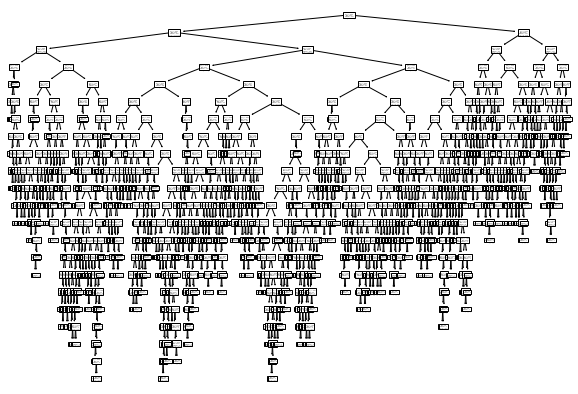

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

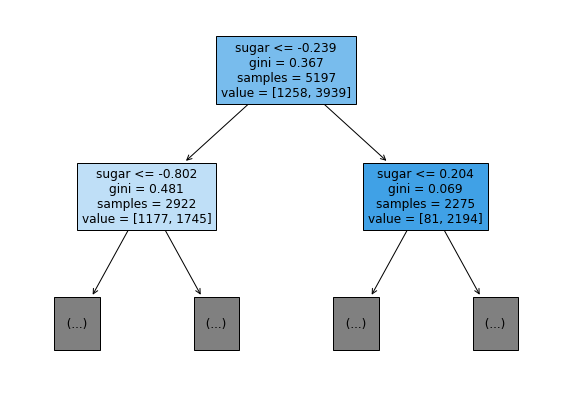

In [17]:
#트리의 깊이를 제한하려면 max_depth 매개변수를 쓰면 됨
#max_depth=1이면 루트 노드를 제외하고 하나의 노드를 더 확장해서 그림
#filled 매개변수에서 클래스에 맞게 노드 색을 칠할 수 있음
#feature_names 매개변수에는 특성의 이름을 전달할 수 있음
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [21]:
#테스트 조건(sugar) 불순도(gini) 총 샘플 수(samples) 클래스별 샘플 수(value)
#조건 만족 시 왼쪽, 불만족 시 오른쪽
#어떤 클래스 비율이 높아지면 점점 진한색으로 표시

#루트 노드에서는 어떻게 당도 -0.239를 기준으로 잡았을까?
#criterion 매개변수는 노드에서 데이터를 분할할 기준을 정하는 건데 여기서 지정된 지니 불순도를 이용함
#지니 불순도(Gini impurity)를 사용했기 때문
#지니 불순도 = 1-(음성 클래스 비율^2 + 양성 클래스 비율^2)
#결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴
#정보이득(information gain) = 부모의 불순도 - (왼쪽 노드 샘플 수/부모의 샘플 수) X (왼쪽 노드 불순도) - (오른쪽 노드 샘플 수/부모의 샘플 수) X (오른쪽 노드 불순도)

#DecisionTreeClassifier클래스에서 criterion='entropy'를 지정하여 엔트로피 불순도를 사용할 수 있음
#엔트로피 불순도 = 1-음성 클래스 비율 X log_2(음성 클래스 비율)-양성 클래스 비율 X log_2(양성 클래스 비율)

#앞의 트리는 제한 없이 자라났기 때문에 훈련 세트보다 테스트 세트에서 점수가 크게 났었음

#max_depth 매개변수를 이용하여 가지치기
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


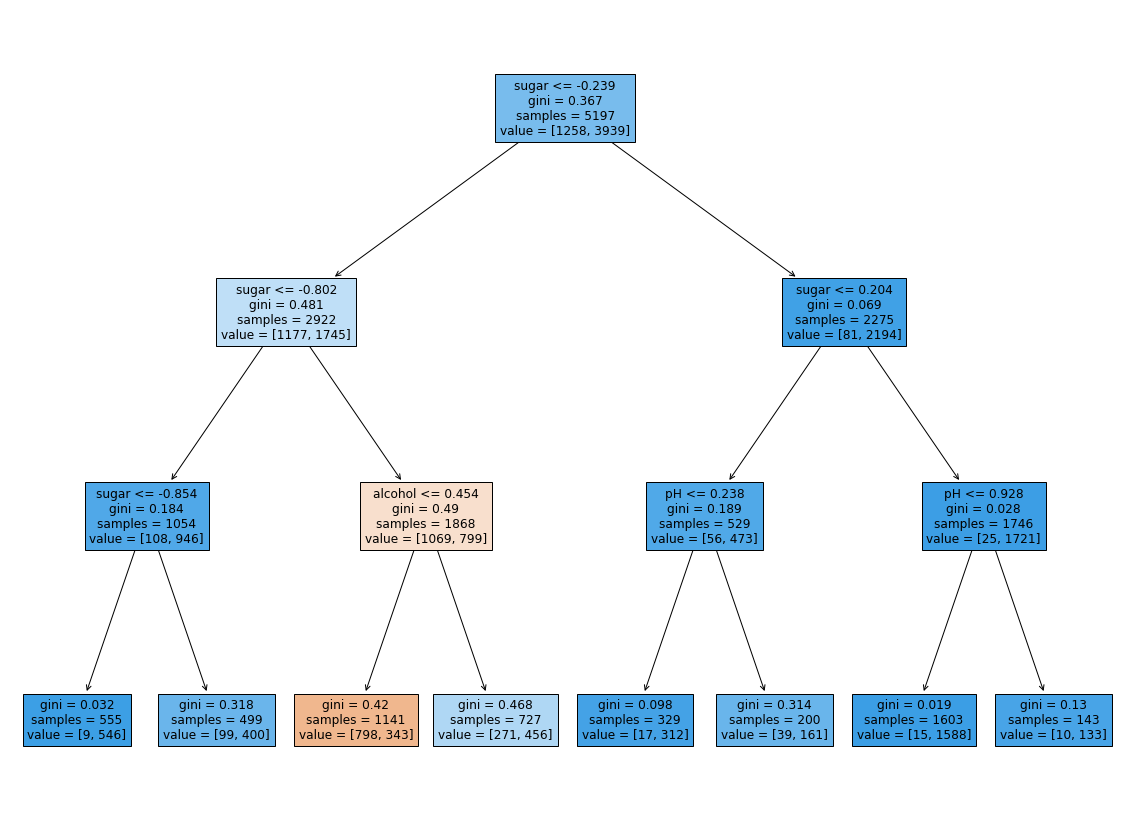

In [22]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [23]:
#결정 트리 알고리즘의 장점은 전처리가 필요 없다는 것이다
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8454877814123533
0.8415384615384616


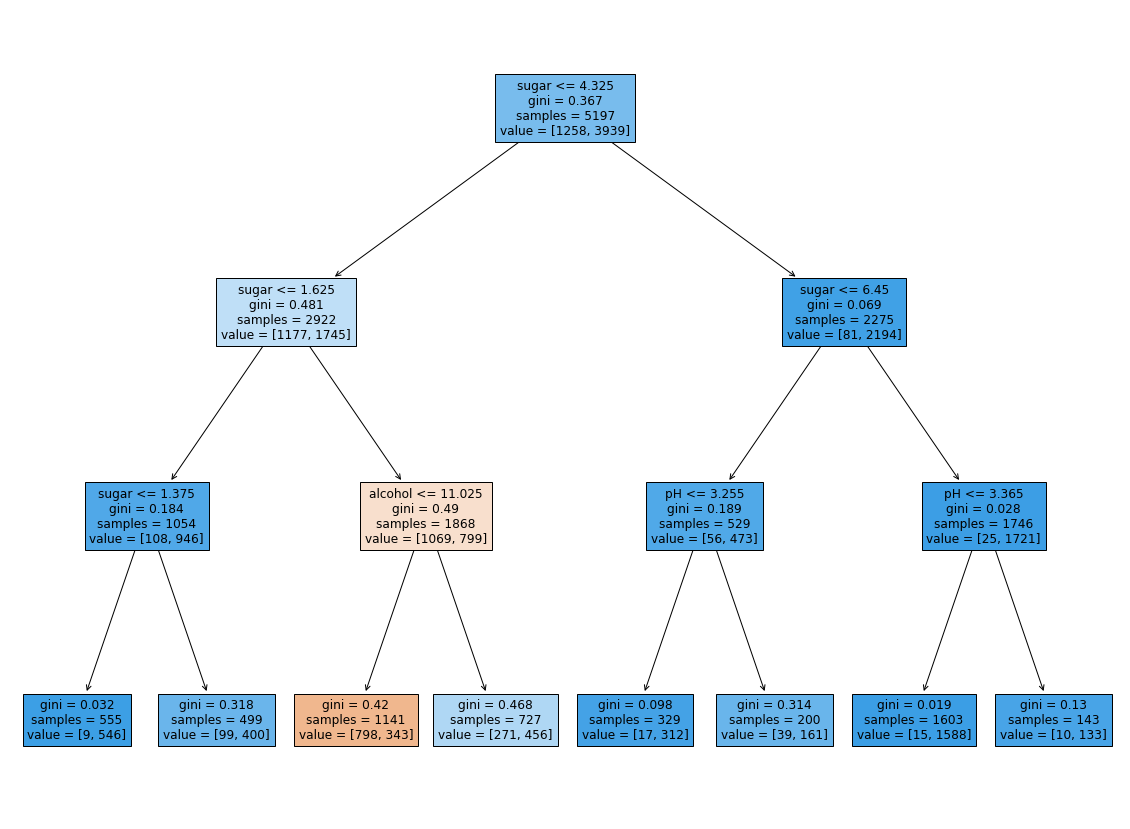

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [26]:
#어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해줌
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
